In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ConsumerKey = "5Rhf7GTCvDUVqfOAE6G7zh2T3"
ConsumerSecret = "E7jKCkzyF6my0j7VxMYNyLMHyVyxz8H7MJjz4Z6stutaPgZUiS"
AccessToken = "1052018922357047296-r6JApBX81nkMBGje7OCsgu4v3x23uc"
AccessTokenSecret = "fQxVMl8QL9fIQLfyPT92TjTac6dJ4AqkVRj344anBTLWe"

In [3]:
auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
posts = api.user_timeline(screen_name="indosat", count = 1000, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) @IlhamLoba Hai kak Ilham sudah mimin infoin ya via Dm yuk bisa di cek ya.Salam^Sam

2) @kokkepoamat Hai Kak, ada yang bisa kami bantu buat Kaka? Yuk bisa infoin melalui DM untuk pertanyaan atau pengalaman yang dialami serta nomornya juga ya Kak akan kami bantu. Salam^Sela

3) @IlhamLoba Hai Kak Ilham. Maaf banget nih, yuk bisa matikan Hp sekitar 2/3 menit agar bisa normal kembali. Jika masih sama bisa infoin Via Dm ya ka nomor Im3 dan lokasi saat ini (JL,RT/RW,Kec,Kota,Prov). Agar mimin bisa bantu cek. Sehat selalu. Trims^Joy https://t.co/0RXhGGW1zB

4) @eternaldreamie Hai Kak, maaf banget ya bikin Kaka ngga nyaman. Untuk langkah awal Kaka bisa matikan Hp sesaat. Jika masih sama, yuk bisa di infokan nomor, lokasi lengkap dan nomor alternatif melalui DM agar bisa mimin bantu cek lebih lanjut ya Kak. Salam^Luna https://t.co/0RXhGGW1zB

5) Jangan dibiasain ya, nanti bisa sakit lambung. Mendingan intip keseruan Kalau Jodoh Takkan Kemana eksklusf di YouTube Indosat Oo

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first of Data
df.head() 

,Tweets
0,@IlhamLoba Hai kak Ilham sudah mimin infoin ya...
1,"@kokkepoamat Hai Kak, ada yang bisa kami bantu..."
2,"@IlhamLoba Hai Kak Ilham. Maaf banget nih, yuk..."
3,"@eternaldreamie Hai Kak, maaf banget ya bikin ..."
4,"Jangan dibiasain ya, nanti bisa sakit lambung...."


In [6]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing Text and Number
  text = re.sub(r'#','', text) #removing Hastag
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlink

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Hai kak Ilham sudah mimin infoin ya via Dm yu...
1,"Hai Kak, ada yang bisa kami bantu buat Kaka? ..."
2,"Hai Kak Ilham. Maaf banget nih, yuk bisa mati..."
3,"Hai Kak, maaf banget ya bikin Kaka ngga nyama..."
4,"Jangan dibiasain ya, nanti bisa sakit lambung...."
...,...
195,"Halo kak, kami informasikan jika untuk nomor ..."
196,"Hai Kak Rina, maaf banget yah atas yang diala..."
197,"Hi Kak Hermawan, maaf atas pengalamannya ya. ..."
198,"Hai kak, udah mimin infoin via DM ya. Yuk lan..."


In [7]:
# Create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectiviy' & 'Polarity'
df['Subjectiviy'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectiviy,Polarity
0,Hai kak Ilham sudah mimin infoin ya via Dm yu...,0.00,0.000000
1,"Hai Kak, ada yang bisa kami bantu buat Kaka? ...",0.00,0.000000
2,"Hai Kak Ilham. Maaf banget nih, yuk bisa mati...",0.65,0.150000
3,"Hai Kak, maaf banget ya bikin Kaka ngga nyama...",0.00,0.000000
4,"Jangan dibiasain ya, nanti bisa sakit lambung....",0.00,0.000000
...,...,...,...
195,"Halo kak, kami informasikan jika untuk nomor ...",0.00,0.000000
196,"Hai Kak Rina, maaf banget yah atas yang diala...",0.00,0.000000
197,"Hi Kak Hermawan, maaf atas pengalamannya ya. ...",0.00,0.000000
198,"Hai kak, udah mimin infoin via DM ya. Yuk lan...",0.00,0.000000


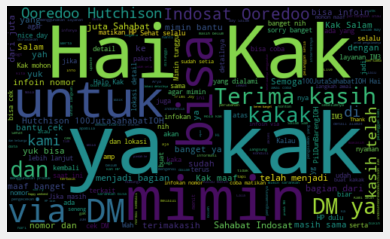

In [8]:
#word cloud visualization
allWords = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectiviy,Polarity,Analysis
0,Hai kak Ilham sudah mimin infoin ya via Dm yu...,0.00,0.000000,neutral
1,"Hai Kak, ada yang bisa kami bantu buat Kaka? ...",0.00,0.000000,neutral
2,"Hai Kak Ilham. Maaf banget nih, yuk bisa mati...",0.65,0.150000,positive
3,"Hai Kak, maaf banget ya bikin Kaka ngga nyama...",0.00,0.000000,neutral
4,"Jangan dibiasain ya, nanti bisa sakit lambung....",0.00,0.000000,neutral
...,...,...,...,...
195,"Halo kak, kami informasikan jika untuk nomor ...",0.00,0.000000,neutral
196,"Hai Kak Rina, maaf banget yah atas yang diala...",0.00,0.000000,neutral
197,"Hi Kak Hermawan, maaf atas pengalamannya ya. ...",0.00,0.000000,neutral
198,"Hai kak, udah mimin infoin via DM ya. Yuk lan...",0.00,0.000000,neutral


In [10]:
print('Negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1)  Hai Kak Dian. Sorry ya ganggu aktivitasnya. Biar bisa mimin bantu tindak lanjuti mohon bisa infoin nomor hpnya via DM ya kak. Salam^Eki 

2)  Sorry banget ya Kak Edi uat pengalamannya. Agar aksesnya ngebut lagi, bisa OFF-ON kan HP dulu ya. Kalau masih sama, infoin nomor HP, lokasi detail, dan nomor alternatifnya lewat DM ya. Salam^Sea 

3)  sorry banget ya kak atas yg dialamin. Mimin saranin langkah awal kakak bisa On-Off hp, clear cache dan coba kembali yah. Kalau masih belum bisa juga yuk infoin nomor IM3 dan lokasi detail ke DM kita yah. Thanks^Yuli 

4)  Hai Kak, sorry banget ya buat pengalamannya. Yuk kak bisa infoin nama, nomor, detail alamat (JL, Kec, Kota, Prov), signal baris &amp; data yang muncul via DM ya Kak agar mimin bisa cek lebih lanjut. Salam ^Arya 

5)  Hai Kak Sorry banget buat pengalamannya ya kak, Mimin udh bantu bales by DM ya kak^Tata

6)  yaah sory banget ya Kak Late respon. Mimin sarankan bisa matikan Hp sesaat ya. jika masih sama yuk info

In [11]:
print('Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1)  Hai Kak Ilham. Maaf banget nih, yuk bisa matikan Hp sekitar 2/3 menit agar bisa normal kembali. Jika masih sama bisa infoin Via Dm ya ka nomor Im3 dan lokasi saat ini (JL,RT/RW,Kec,Kota,Prov). Agar mimin bisa bantu cek. Sehat selalu. Trims^Joy 

2)  Pagi Kak Alfie, mimin ngerti bgt yg kaka rasakan saat ini. Agar bisa mimin bantu pengecekan kuy boleh di infokan untuk nomor, lokasi detail via DM yah kak. Have a nice day. Salam^Nuy 

3)  Hai Kak Alfie maaf banget ya. Bisa coba clear cache, tutup aplikasi yang berjalan, serta off/on HP dulu ya. Jika masih sama, yuk infoin nomor dan lokasi detail via DM agar bisa mimin bantu cek. Salam^Pia 

4)  Hai Kak, mimin bantu infokan terkait GA Live 100jt pelanggan tidak ada ya kak. Kakak bisa cek terkait Update atau informasi terbaru di Akun Social Media kami ya kak. Sehat selalu kakak ^Bob

5)  Maaf banget Kak, biar akses jaringannya makin lancar solusi awal coba airplane mode beberapa saat ya,semoga bisa normal lagi, jika mas

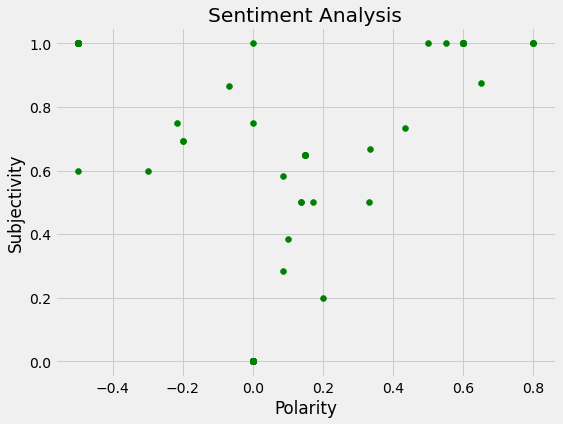

In [12]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectiviy'][i], color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
#persentasepositiv
potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

15.5

In [14]:
#persentasenegatif
netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

10.5

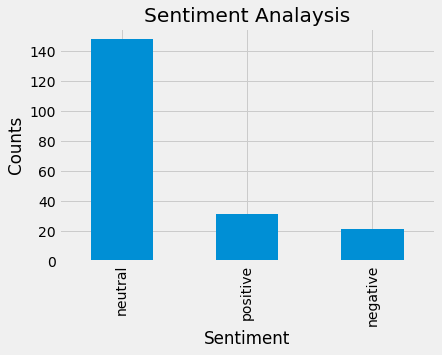

In [15]:
#show value count
df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()